FIRST_NAME = "Rucha"

LAST_NAME = "Tatawar"

STUDENT_ID = "801420899"

In this step, we import essential libraries to handle and analyze data. pandas is used for data manipulation, numpy for numerical operations, and matplotlib and seaborn for visualization. We also import machine learning tools such as RandomForestClassifier and utilities for data preprocessing.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

The dataset is loaded from a specified file path using pandas' read_csv() function, which converts the CSV file into a DataFrame. This makes it easy to manipulate and analyze the data in tabular form. The first few rows are displayed to understand the structure of the dataset.

In [2]:
# Step 2: Load the dataset (make sure the dataset is already in your working directory or use the path)
file_path = '/content/sample_data/credit_risk_dataset.csv'  # Update the path to your actual file
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print(df.head())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


We first check for missing values in the dataset using isnull().sum(), which counts the number of missing entries in each column. Then, we replace any missing numerical values with the mean of the respective columns. This step ensures that the model doesn't encounter issues due to incomplete data.

In [3]:
# Step 3: Handle missing data
# Let's first check for missing data
print("\nMissing data in each column:")
print(df.isnull().sum())

# Replace missing numerical data with mean or median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' if preferred
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Check again if there are any missing values
print("\nMissing data after imputation:")
print(df.isnull().sum())



Missing data in each column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Missing data after imputation:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


To make categorical variables usable for machine learning, we apply One-Hot Encoding using pd.get_dummies(). This method transforms categorical values like 'OWN' and 'RENT' into binary columns, with each column representing one category. This transformation ensures that the model can process these features numerically.

In [4]:
# Step 4: Handle categorical columns (One-Hot Encoding for non-ordinal categories)
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade']

# Use pd.get_dummies() for one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check if all columns are numeric now
print("\nData types after encoding:")
print(df.dtypes)



Data types after encoding:
person_age                     float64
person_income                  float64
person_emp_length              float64
loan_amnt                      float64
loan_int_rate                  float64
loan_status                    float64
loan_percent_income            float64
cb_person_default_on_file       object
cb_person_cred_hist_length     float64
person_home_ownership_OTHER       bool
person_home_ownership_OWN         bool
person_home_ownership_RENT        bool
loan_intent_EDUCATION             bool
loan_intent_HOMEIMPROVEMENT       bool
loan_intent_MEDICAL               bool
loan_intent_PERSONAL              bool
loan_intent_VENTURE               bool
loan_grade_B                      bool
loan_grade_C                      bool
loan_grade_D                      bool
loan_grade_E                      bool
loan_grade_F                      bool
loan_grade_G                      bool
dtype: object


After encoding the categorical variables, we check the data types of all columns to confirm they are numeric. If any columns contain non-numeric values, we forcefully convert them to numeric using pd.to_numeric() and handle any errors by converting them to NaN. We then fill any remaining NaN values with zero to ensure consistency.

In [5]:
# Step 5: Preprocess data
# Features and target variable
X = df.drop(columns=['loan_status'])  # Drop target column from features
y = df['loan_status']  # Target variable (loan status: 1 = Default, 0 = No Default)


In this step, we separate the features (input variables) and the target variable (the output we want to predict). The features are stored in X, and the target variable loan_status is stored in y. This separation is essential for training the model to predict whether a loan will default based on the features.

In [6]:
# Step 6: Convert all columns to numeric types (if there are any string columns left)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any remaining non-numeric columns to NaN
X.fillna(0, inplace=True)  # Replace NaN values with 0 (or you can choose to impute)


The dataset is split into two parts: a training set and a test set, using the train_test_split() function. The model will learn from the training set and be evaluated on the test set to gauge its performance. Typically, 80% of the data is used for training, and 20% for testing.



In [7]:
# Step 7: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



A Random Forest classifier is used to train the model. This ensemble method creates multiple decision trees, each making its own prediction, and then aggregates the results for a final decision. The model is trained using the training data (X_train and y_train), learning patterns to predict loan defaults.

In [8]:
# Step 8: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

Once the model is trained, we use it to predict loan defaults on the test data (X_test). The model generates predictions (1 for default, 0 for no default), which are stored in y_pred. These predictions will be compared to the actual values (y_test) to assess the model's performance.

In [9]:
# Step 9: Make predictions on the test data
y_pred = rf_model.predict(X_test)



The performance of the model is evaluated using several metrics: accuracy, classification report, and confusion matrix. Accuracy gives the proportion of correct predictions, while the classification report provides precision, recall, and F1-score. The confusion matrix shows the counts of true positives, false positives, true negatives, and false negatives.

In [10]:
# Step 10: Evaluate the model
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy Score:  0.9343256099432254

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5179
         1.0       0.96      0.71      0.82      1338

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.94      0.93      0.93      6517


Confusion Matrix:
 [[5135   44]
 [ 384  954]]


Feature importance measures how much each input variable contributes to the model's predictions. We extract this information from the trained Random Forest model and visualize it using a horizontal bar chart. This allows us to identify the most influential features in predicting loan default.

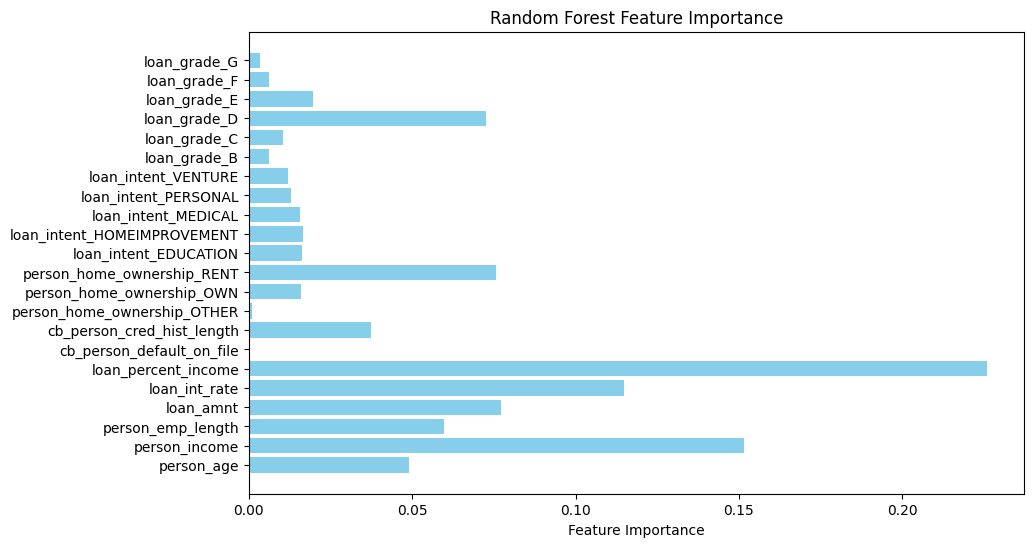

In [11]:
# Step 11: Plot Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()



The correlation matrix is computed to analyze the relationships between numerical features in the dataset. We use a heatmap to visualize these correlations, helping to identify highly correlated features. This insight can guide feature selection.

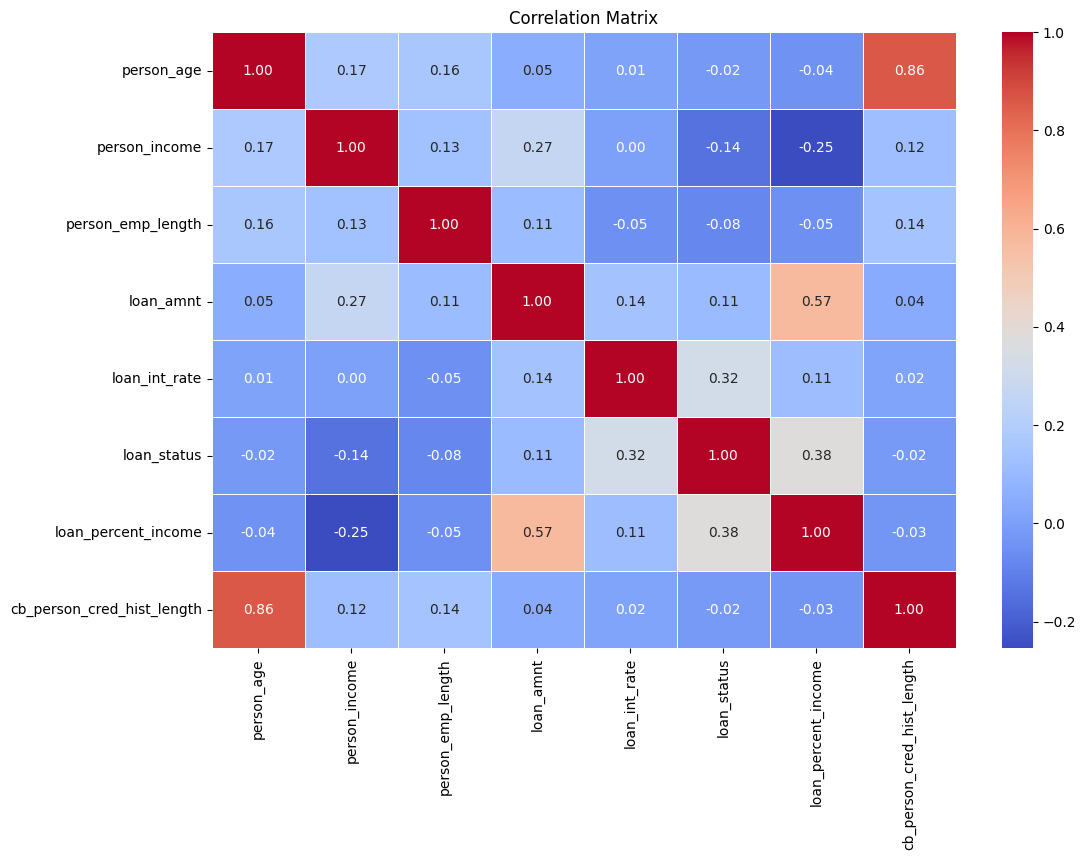

In [12]:
# Step 12: Plot Correlation Matrix
# Calculate the correlation matrix (only for numerical features)
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()